Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline


In [25]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [30]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
# define numerical and categorial columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('We have {} categorial features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorial features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
# Adding columns reflect Total and Average score
df['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


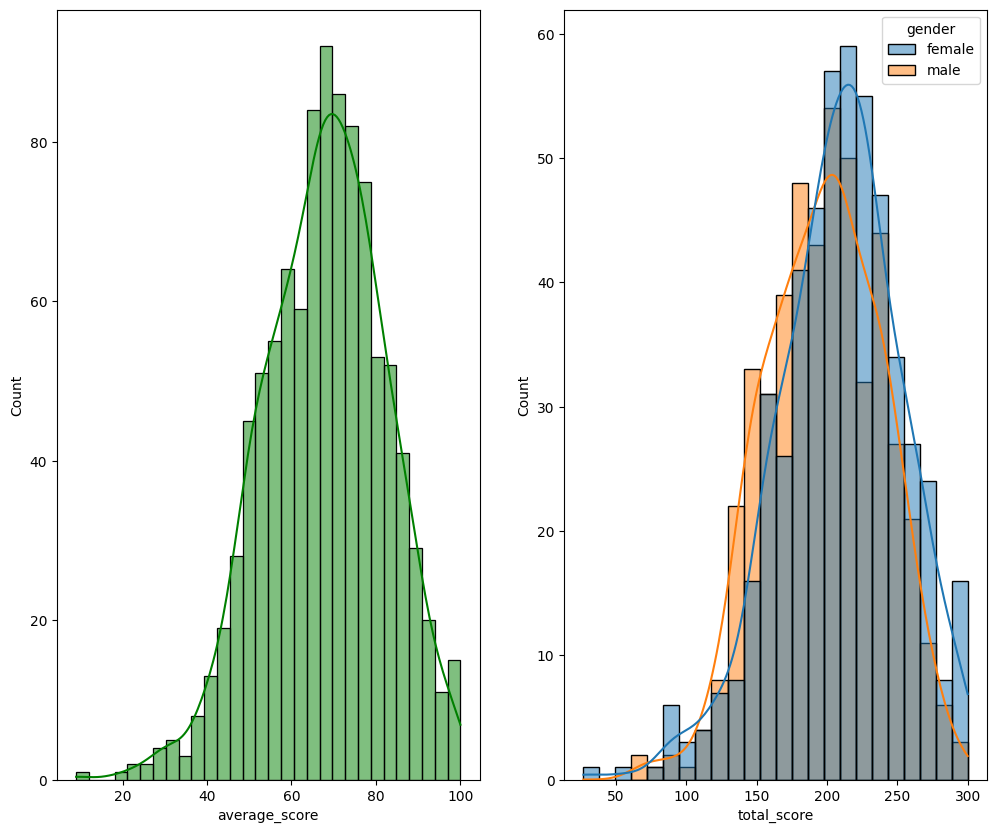

In [36]:
# Data visualization
fig,axs= plt.subplots(1,2, figsize=(12,10))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

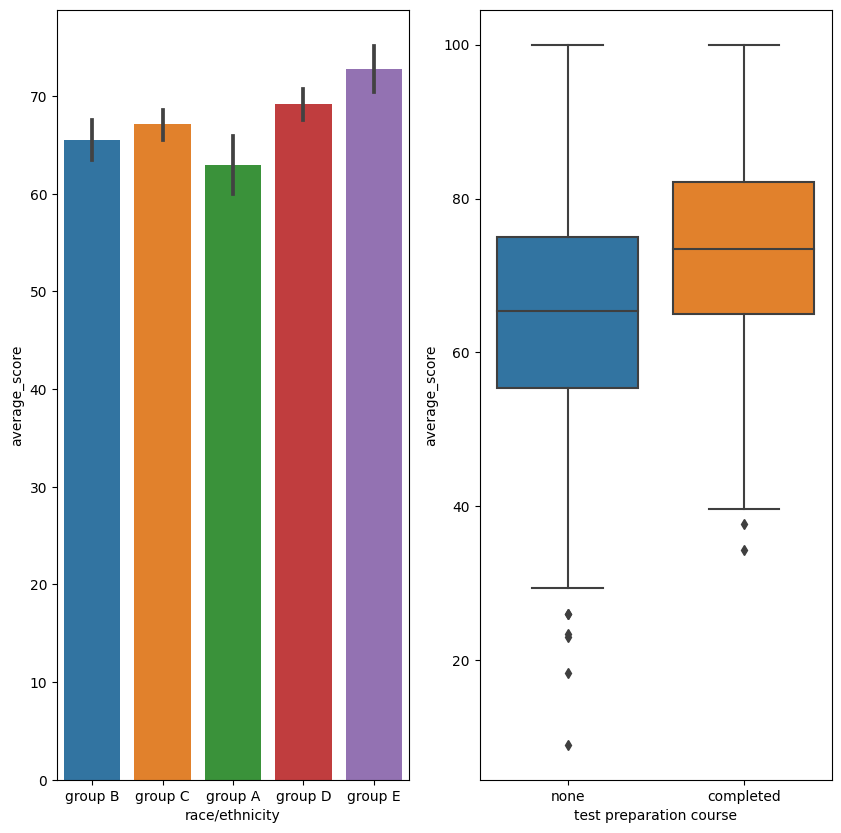

In [44]:
fig, ax=plt.subplots(1,2, figsize=(10,10))
plt.subplot(121)
sns.barplot(data=df,x='race/ethnicity',y='average_score')
plt.subplot(122)
sns.boxplot(data=df, x='test preparation course', y='average_score')


plt.tight_layout

plt.show()

(-1.1183542859484743, 1.100874013616594, -1.1160602496655583, 1.1258298729367)

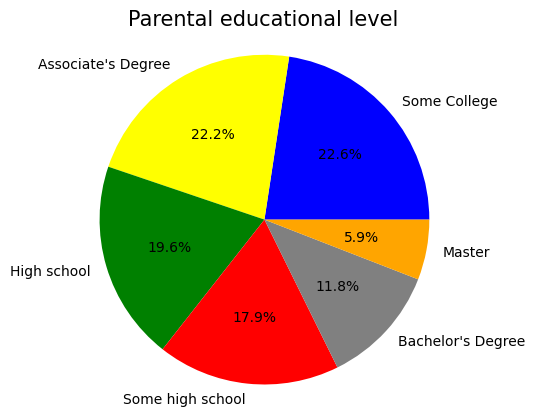

In [53]:
size = df['parental level of education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High school', 'Some high school', "Bachelor's Degree", "Master"]
color = ['blue','yellow', 'green', 'red', 'grey', 'orange']

plt.pie(size, colors=color, labels=labels,autopct= '%.1f%%')
plt.title('Parental educational level', fontsize=15)
plt.axis('equal')